In [1]:
import sys
module_path = 'C:/Users/94735/OneDrive - UW-Madison/My Projects/CMT_and_inverse_design/Meta_SCMT'
sys.path.insert(1, module_path)
import Meta_SCMT
import numpy as np
import matplotlib.pyplot as plt

# 1 modes forward process

In [5]:
GP = {
    'dim' : 1, #dim : 1 or 2.
    'modes' : 1, #number of modes with in a single waveguide. modes <= 2 is usually good enough.
    'period' : 0.28,
    'res' : 20, #resolution within one period
    'downsample_ratio': 1, #between (0, 1] for the output periodic resolution, it will be int(round(downsample_ratio * res))
    'wh' : 0.6, #waveguide height
    'lam' : 0.66,
    'n_sub' : 1.46, #the refractive index of substrate.
    'n_wg' : 2.4,# the refractive index of waveguide
    'h_min' : 0.06, #h_min, and h_max define the range of the width of waveguide.
    'h_max' : 0.27,
    'dh' : 0.01, #the step size of h.
    'path' : "sim_cache_TiO2_1mode/", #the inter state store path            
}
sim = Meta_SCMT.Sim(**GP)

# the phase lib seems different from FDTD results, need more investigation.

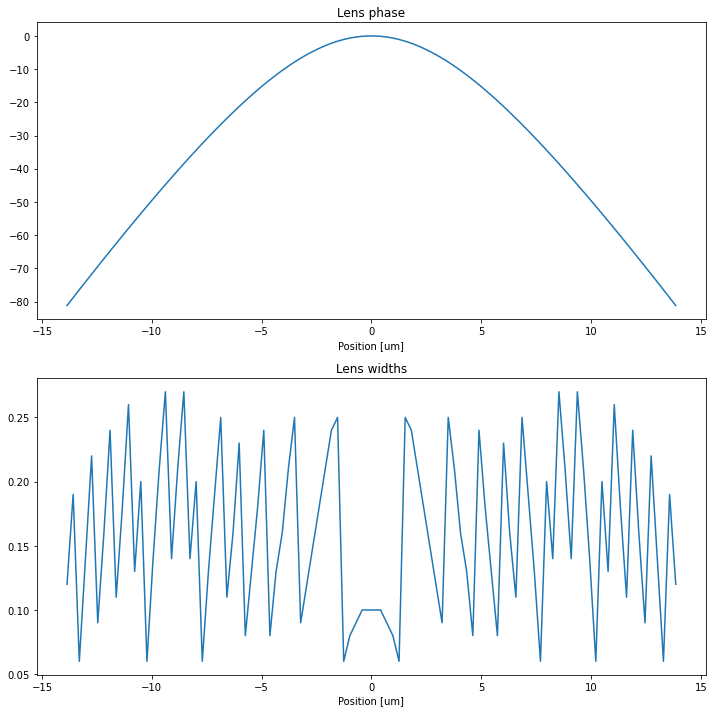

In [6]:
N = 100
theta = 0#unit [rad]
prop_dis = 0.25 * N * GP['period']
wgs = sim.PBA.design_lens(N, prop_dis, load = True)

coo_sparse generated.
coo_sparse generated.
dis model input generated.
initialized by loaded h_paras.


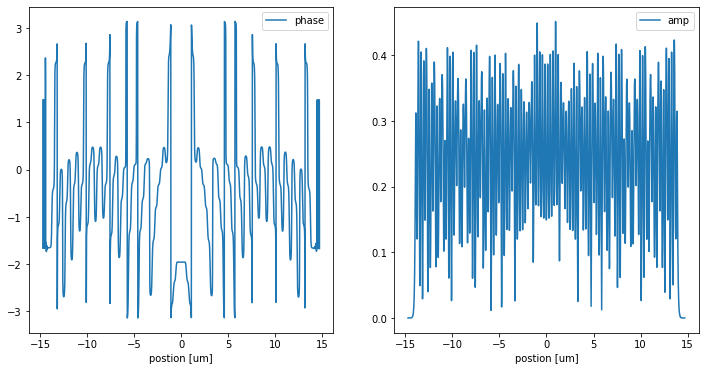

In [7]:
sim.scmt.init_model(N, prop_dis, COUPLING = True, init_hs= wgs, far_field= False)
E_out =sim.scmt.forward(theta = theta)
sim.scmt.vis_field(E_out)

coo_sparse generated.
coo_sparse generated.
dis model input generated.
initialized by loaded h_paras.


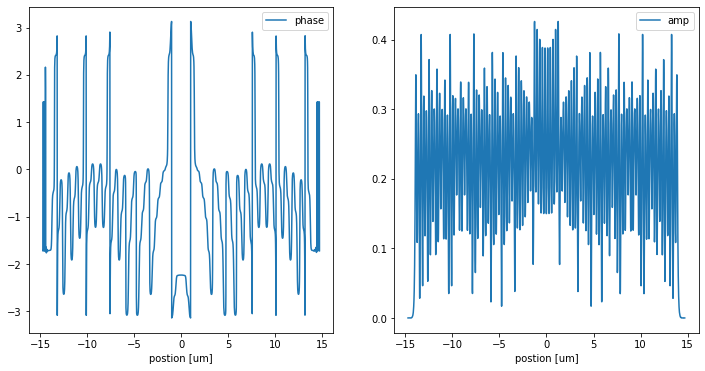

In [8]:
sim.scmt.init_model(N, prop_dis, COUPLING = False, init_hs= wgs, far_field= False)
E_out =sim.scmt.forward(theta = theta)
sim.scmt.vis_field(E_out)

In [9]:
E_1mode = E_out

# 2 modes

In [10]:
GP = {
    'dim' : 1, #dim : 1 or 2.
    'modes' : 2, #number of modes with in a single waveguide. modes <= 2 is usually good enough.
    'period' : 0.28,
    'res' : 20, #resolution within one period
    'downsample_ratio': 1, #between (0, 1] for the output periodic resolution, it will be int(round(downsample_ratio * res))
    'wh' : 0.6, #waveguide height
    'lam' : 0.66,
    'n_sub' : 1.46, #the refractive index of substrate.
    'n_wg' : 2.4,# the refractive index of waveguide
    'h_min' : 0.06, #h_min, and h_max define the range of the width of waveguide.
    'h_max' : 0.27,
    'dh' : 0.01, #the step size of h.
    'path' : "sim_cache_TiO2_2mode/", #the inter state store path            
}
sim = Meta_SCMT.Sim(**GP)

coo_sparse generated.
coo_sparse generated.
dis model input generated.
initialized by loaded h_paras.


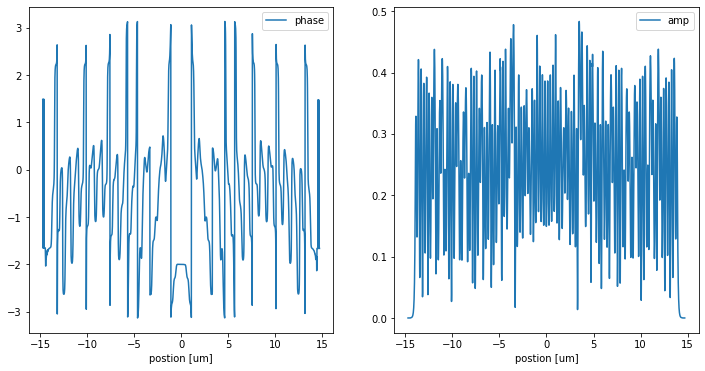

In [11]:
sim.scmt.init_model(N, prop_dis, COUPLING = True, init_hs= wgs, far_field= False)
E_out =sim.scmt.forward(theta = theta)
sim.scmt.vis_field(E_out)

In [12]:
E_2mode = E_out

# fullwave

Fullwave resolution: 50
total running time: 1.1007615120208131e-12
Initializing simulation...
Mesh step (micron): [2.00e-02, 2.00e-02, 2.00e-02].
Simulation domain in number of grid points: [4230, 1, 510].
Total number of computational grid points: 2.16e+06.
Total number of time steps: 31755.
Estimated data size (GB) of monitor monitor: 0.0968.
Estimated data size (GB) of monitor monitor_1: 0.0001.


C:/Users/94735/OneDrive - UW-Madison/My Projects/CMT_and_inverse_design/Meta_SCMT\Meta_SCMT\fullwave_1D.py:13: UserWarning: Fullwave is expensive and slow. Only do fullwave on small devices. And low resolution can be inaccurate.
  warnings.warn("Fullwave is expensive and slow. Only do fullwave on small devices. And low resolution can be inaccurate.")


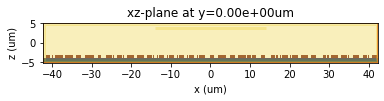

In [13]:
sim.fullwave.init_sim(prop_dis, N, wgs, res = 50, theta = theta)

In [14]:
# sim.fullwave.upload(task_name="1D_lens_N" + str(N))
# sim.fullwave.download(data_path="output_tidy3d/")

Using Tidy3D credentials from stored file
Uploading the json file...
Project '1D_lens_N100' status: success...                                  

Simulation domain Nx, Ny, Nz: [4230, 1, 510]
Applied symmetries: [0, 0, 0]
Number of computational grid points: 2.1573e+06.
Using subpixel averaging: True
Number of time steps: 31755
Automatic shutoff factor: 1.00e-05
Time step (s): 3.4665e-17

Compute source modes time (s):     0.1374
Compute monitor modes time (s):    0.1519

Rest of setup time (s):            0.4682

Starting solver...
- Time step    505 / time 1.75e-14s (  1 % done), field decay: 1.00e+00
- Time step   1270 / time 4.40e-14s (  4 % done), field decay: 1.00e+00
- Time step   2540 / time 8.80e-14s (  8 % done), field decay: 2.82e-02
- Time step   3810 / time 1.32e-13s ( 12 % done), field decay: 5.74e-03
- Time step   5080 / time 1.76e-13s ( 16 % done), field decay: 1.79e-03
- Time step   6350 / time 2.20e-13s ( 20 % done), field decay: 6.94e-04
- Time step   7621 / time 2.64

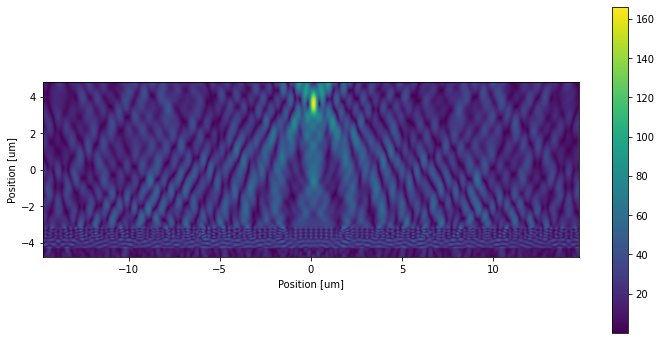

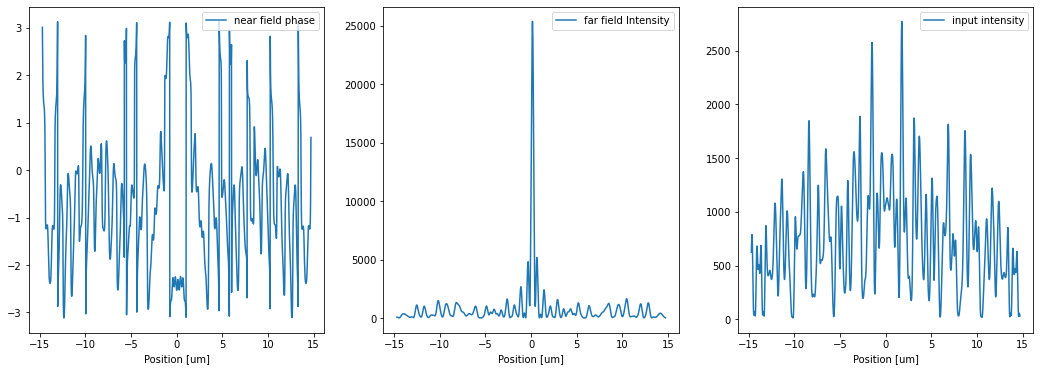

In [15]:
Ey_xz_raw, data_near, data_far = sim.fullwave.vis_monitor(path = "output_tidy3d/1D_lens_N" + str(N))

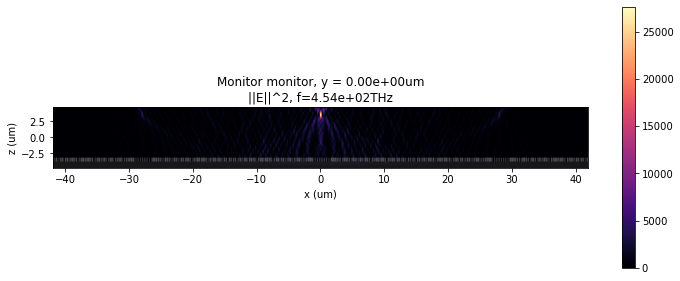

In [17]:
# _, ax = plt.subplots(1, 1, figsize=(12, 6))
# sim.fullwave.sim.viz_field_2D(sim.fullwave.sim.monitors[0], ax=ax, cbar=True, comp='y', val='int')

In [18]:
E_fullwave = data_near['Ey']

In [19]:
Ifw_far = np.abs(data_far['Ey'])**2

# for the near field, the mode1 phase is more accurate than mode2. the mode1 amp is less accurate than mode2.

In [20]:
def get_phase_offset(E1, E2):
    L2_dis = np.inf
    theta_opt = 0
    for theta in np.linspace(0, 2 * np.pi, 300):
        E_temp = E1 * np.exp(1j * theta)
        phase_temp = np.angle(E_temp)
        phase2 = np.angle(E2)
        dis_temp = ((phase_temp - phase2)**2).sum()
        if dis_temp < L2_dis:
            L2_dis = dis_temp
            theta_opt = theta
    print("minimum phase l2 dis:", L2_dis)
    return theta_opt

In [21]:
b = 50
ph1_offset = get_phase_offset(E_1mode[b:-b], E_fullwave[b:-b])
ph2_offset = get_phase_offset(E_2mode[b:-b], E_fullwave[b:-b])

minimum phase l2 dis: 4502.090670825224
minimum phase l2 dis: 4236.699623843153


In [22]:
print(ph1_offset, ph2_offset)

5.946961344253588 6.031017334985088


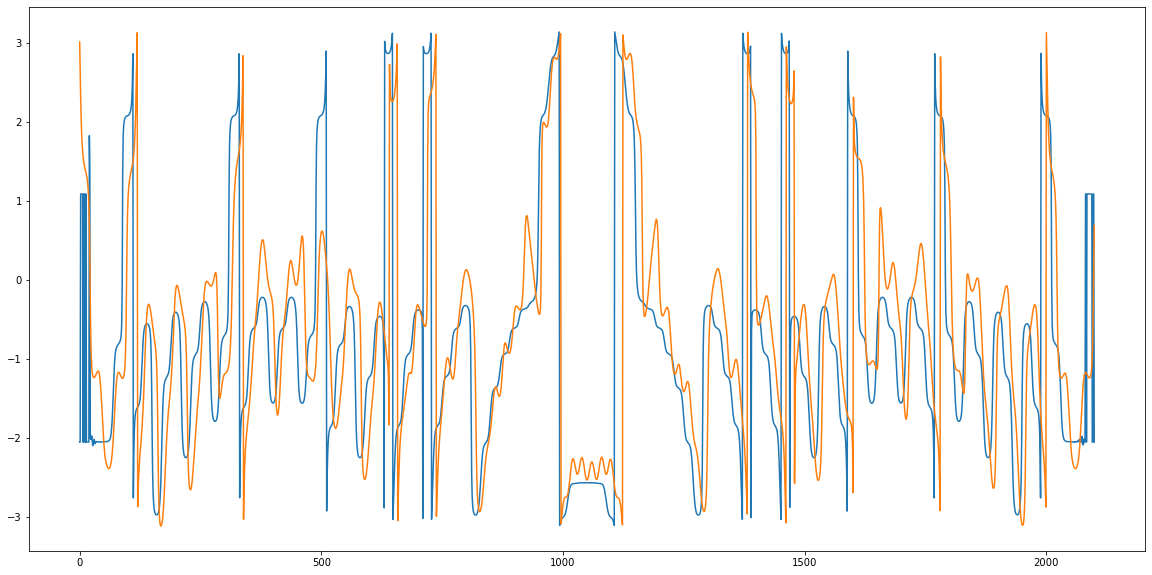

In [23]:
plt.figure(figsize = (20, 10))
plt.plot(np.angle(E_1mode * np.exp(1j * ph1_offset)))
plt.plot(np.angle(E_fullwave))

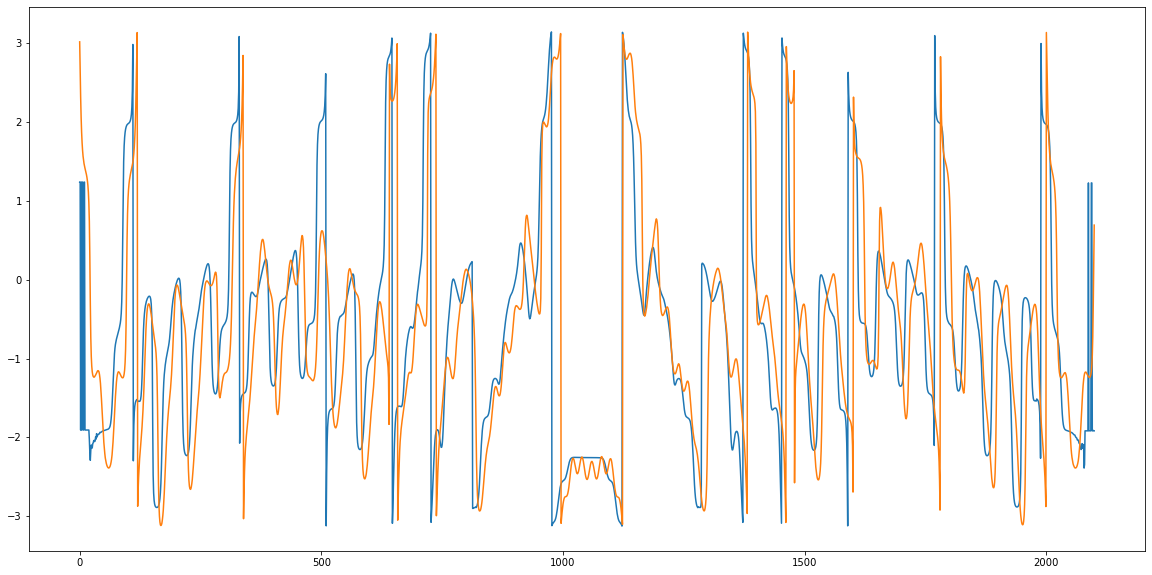

In [24]:
plt.figure(figsize = (20, 10))
plt.plot(np.angle(E_2mode * np.exp(1j * ph2_offset)))
plt.plot(np.angle(E_fullwave))

In [25]:
def normalize(x):
    x = np.abs(x)
    x = x/x.max()
    return x

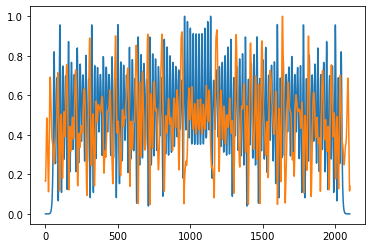

In [26]:
plt.plot(normalize(E_1mode))
plt.plot(normalize(E_fullwave))

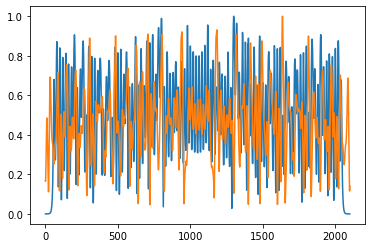

In [27]:
plt.plot(normalize(E_2mode))
plt.plot(normalize(E_fullwave))

In [28]:
def mse(x1, x2):
    size = x1.size
    mse = np.sqrt(((x1 - x2)**2).sum()/size)
    return mse

In [29]:
mse(normalize(E_1mode), normalize(E_fullwave))

0.3153720985199516

In [30]:
mse(normalize(E_2mode), normalize(E_fullwave))

0.310383066305958

# compare far field

coo_sparse generated.
coo_sparse generated.
dis model input generated.
initialized by loaded h_paras.


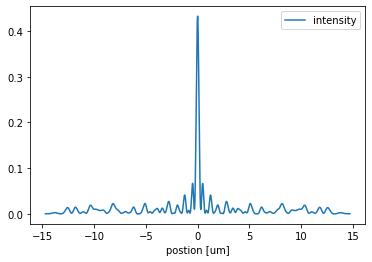

In [32]:
GP = {
    'dim' : 1, #dim : 1 or 2.
    'modes' : 1, #number of modes with in a single waveguide. modes <= 2 is usually good enough.
    'period' : 0.28,
    'res' : 20, #resolution within one period
    'downsample_ratio': 1, #between (0, 1] for the output periodic resolution, it will be int(round(downsample_ratio * res))
    'wh' : 0.6, #waveguide height
    'lam' : 0.66,
    'n_sub' : 1.46, #the refractive index of substrate.
    'n_wg' : 2.4,# the refractive index of waveguide
    'h_min' : 0.06, #h_min, and h_max define the range of the width of waveguide.
    'h_max' : 0.27,
    'dh' : 0.01, #the step size of h.
    'path' : "sim_cache_TiO2_1mode/", #the inter state store path            
}
sim = Meta_SCMT.Sim(**GP)

sim.scmt.init_model(N, prop_dis, COUPLING = True, init_hs= wgs, far_field= True)
E_out =sim.scmt.forward(theta = theta)
sim.scmt.vis_field(E_out)
I1_far = E_out

coo_sparse generated.
coo_sparse generated.
dis model input generated.
initialized by loaded h_paras.


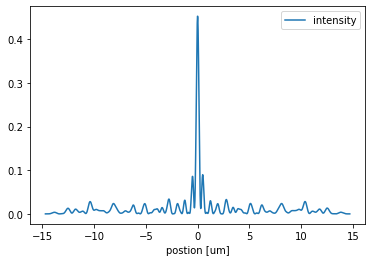

In [34]:
GP = {
    'dim' : 1, #dim : 1 or 2.
    'modes' : 2, #number of modes with in a single waveguide. modes <= 2 is usually good enough.
    'period' : 0.28,
    'res' : 20, #resolution within one period
    'downsample_ratio': 1, #between (0, 1] for the output periodic resolution, it will be int(round(downsample_ratio * res))
    'wh' : 0.6, #waveguide height
    'lam' : 0.66,
    'n_sub' : 1.46, #the refractive index of substrate.
    'n_wg' : 2.4,# the refractive index of waveguide
    'h_min' : 0.06, #h_min, and h_max define the range of the width of waveguide.
    'h_max' : 0.27,
    'dh' : 0.01, #the step size of h.
    'path' : "sim_cache_TiO2_2mode/", #the inter state store path            
}
sim = Meta_SCMT.Sim(**GP)

sim.scmt.init_model(N, prop_dis, COUPLING = True, init_hs= wgs, far_field= True)
E_out =sim.scmt.forward(theta = theta)
sim.scmt.vis_field(E_out)
I2_far = E_out

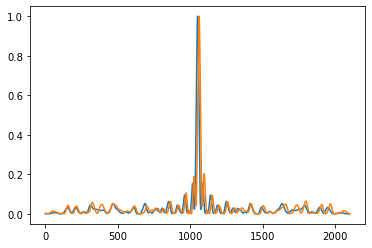

In [35]:
plt.plot(normalize(I1_far))
plt.plot(normalize(Ifw_far))

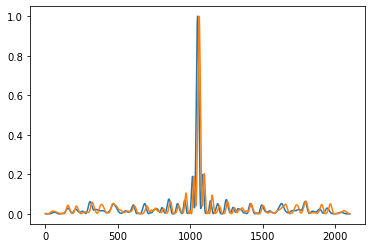

In [36]:
plt.plot(normalize(I2_far))
plt.plot(normalize(Ifw_far))

In [37]:
mse(normalize(I2_far), normalize(Ifw_far))

0.07135642974331725

In [38]:
mse(normalize(I1_far), normalize(Ifw_far))

0.07119916293691826